<a href="https://colab.research.google.com/github/takhilabhinav/Loandefault_XAI/blob/main/LOAN_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link="https://drive.google.com/file/d/1V5hdf7zVNnSDbVXz9qiYIKiWVBGHvZmW/"
id = link.split("/")[-2] 
print (id) # Verify that you have everything after '='

1V5hdf7zVNnSDbVXz9qiYIKiWVBGHvZmW


In [4]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('lending_club_loan_two.csv')

In [5]:
import pandas as pd


In [6]:
data=pd.read_csv('lending_club_loan_two.csv')

In [7]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [9]:
data.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


EXPLORATORY DATA **ANALYSIS**

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


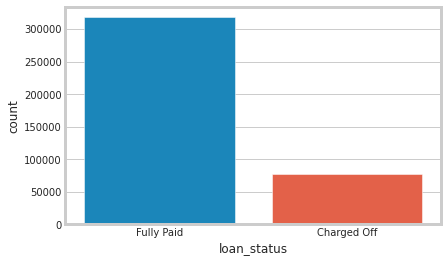

In [11]:
sns.countplot(data.loan_status)


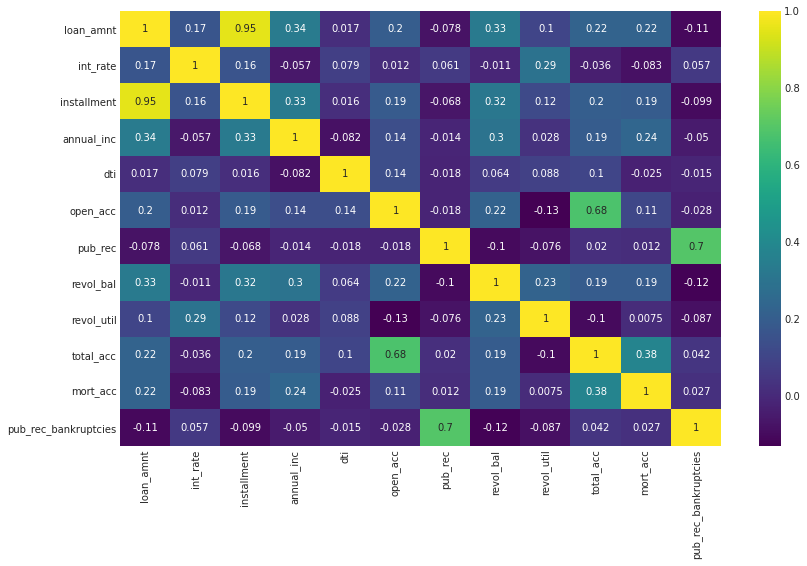

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

We noticed almost perfect correlation between "loan_amnt" the "installment" feature. We'll explore this features further. Print out their descriptions and perform a scatterplot between them.

Does this relationship make sense to you?
Do we think there is duplicate information here?

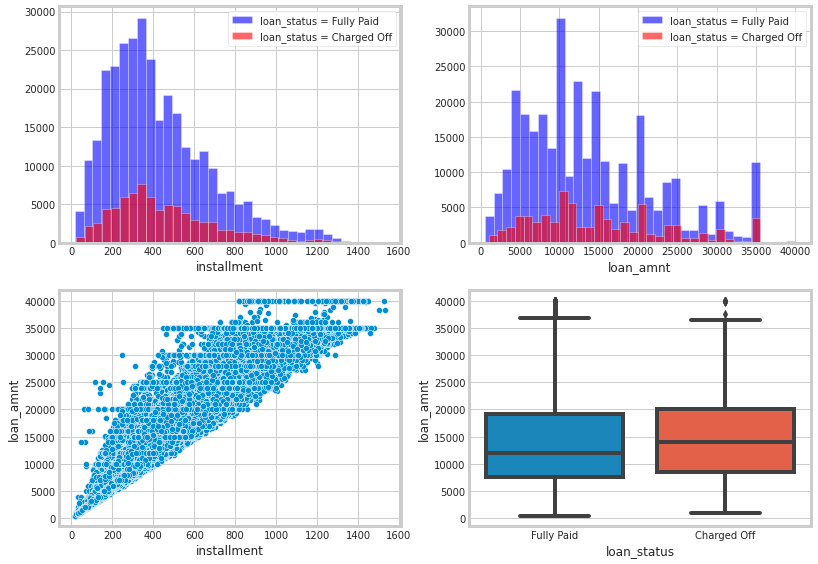

In [13]:
plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
data[data["loan_status"] == "Fully Paid"]["installment"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["installment"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("installment")

plt.subplot(4, 2, 2)
data[data["loan_status"] == "Fully Paid"]["loan_amnt"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["loan_amnt"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("loan_amnt")

plt.subplot(4, 2, 3)
sns.scatterplot(x='installment', y='loan_amnt', data=data)

plt.subplot(4, 2, 4)
sns.boxplot(x='loan_status', y='loan_amnt', data=data)

In [14]:
data.groupby(by='loan_status')['loan_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


In [15]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


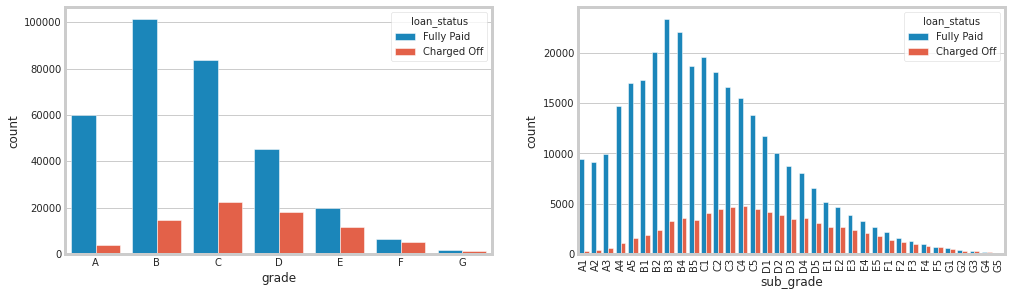

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.

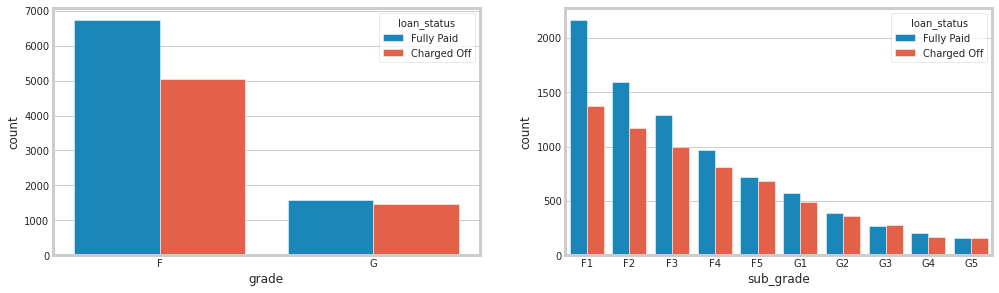

In [17]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

In [18]:
data.home_ownership.value_counts()


MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [19]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

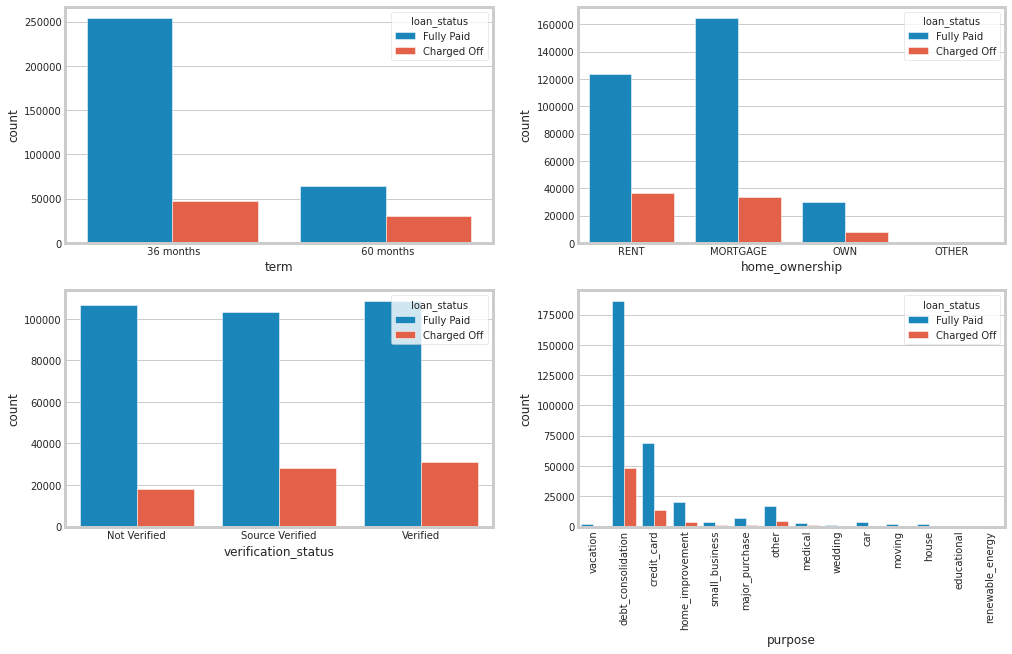

In [20]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Text(0.5, 0, 'annual_inc')

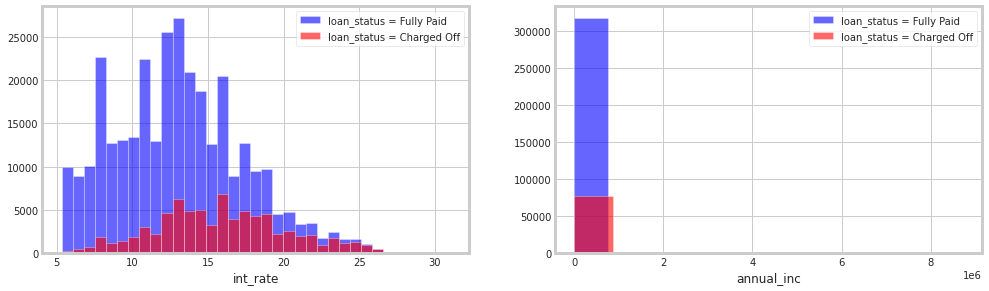

In [21]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
data[data["loan_status"] == "Fully Paid"]["int_rate"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["int_rate"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("int_rate")

plt.subplot(2, 2, 2)
data[data["loan_status"] == "Fully Paid"]["annual_inc"].hist(bins=10, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["annual_inc"].hist(bins=10, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("annual_inc")

In [22]:
data[data.annual_inc >= 1000000].shape


(75, 27)

In [23]:
data.emp_title.isna().sum()


22927

In [24]:
data['emp_title'] = data.emp_title.str.lower()


In [25]:
def manager(string):
    if type(string) is str:
        return 'manager' if 'manager' in string else string

def president(string):
    if type(string) is str:
        return 'president' if 'president' in string else string
    
def nurse(string):
    if type(string) is str:
        return 'nurse' if 'nurse' in string else string
    
def driver(string):
    if type(string) is str:
        return 'driver' if 'driver' in string else string
    
def assistant(string):
    if type(string) is str:
        return 'assistant' if 'assistant' in string else string

def engineer(string):
    if type(string) is str:
        return 'engineer' if 'engineer' in string else string    

functions = [manager, president, nurse, driver, assistant, engineer]
for func in functions:
    data['emp_title'] = data.emp_title.apply(func)


In [26]:
data.emp_title.value_counts()[:30]


manager              39831
engineer              8603
assistant             7548
driver                5743
teacher               5430
nurse                 5146
president             3276
supervisor            2591
sales                 2382
owner                 2201
rn                    2074
director              1192
police officer        1041
accountant             845
technician             839
mechanic               753
attorney               744
analyst                703
us army                671
paralegal              586
customer service       563
server                 538
electrician            527
foreman                506
operator               490
controller             470
consultant             463
bank of america        459
clerk                  452
account executive      447
Name: emp_title, dtype: int64

Text(0.5, 1.0, 'The most 30 jobs title afforded a loan')

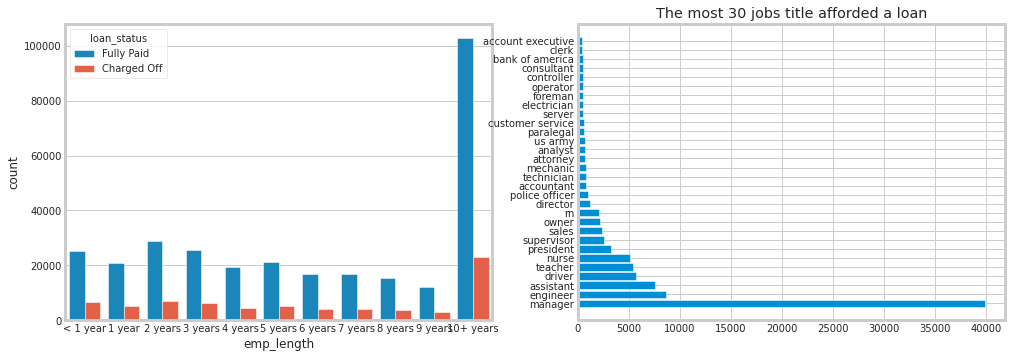

In [27]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")

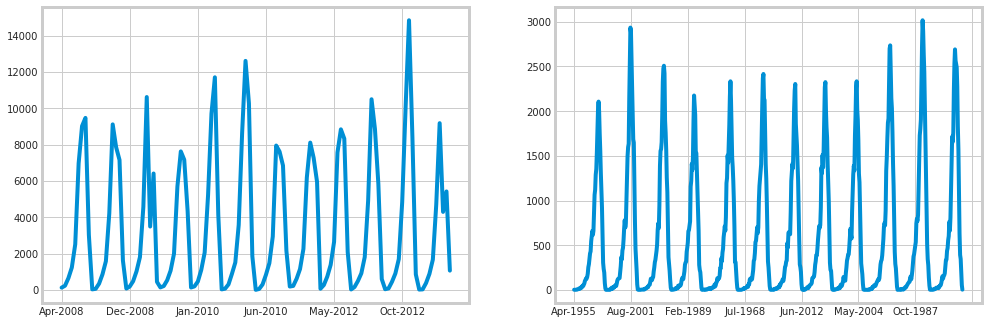

In [28]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
data.issue_d.value_counts().sort_index().plot()

plt.subplot(2, 2, 2)
data.earliest_cr_line.value_counts().sort_index().plot()

In [29]:
data.title.isna().sum()


1755

In [30]:
data['title'] = data.title.str.lower()


In [31]:
data.title.value_counts()[:30]


debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
consolidation loan             1887
vacation                       1866
credit card refinance          1832
moving and relocation          1693
consolidate                    1528
personal                       1465
home buying                    1196
loan                           1150
payoff                         1035
credit cards                   1030
freedom                         934
debt                            933
my loan                         897
credit card loan                879
credit card                 

In [32]:
data.dti.value_counts()


0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
46.51      1
43.24      1
46.77      1
92.13      1
40.14      1
Name: dti, Length: 4262, dtype: int64

In [33]:
data[data.open_acc > 40].shape

(217, 27)

In [34]:
data[data.total_acc > 80].shape

(266, 27)

In [35]:
data[data.revol_bal < 10000].shape

(177624, 27)

In [36]:
data[data.revol_util > 200]


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.00,36 months,12.49,117.08,B,B4,budget analyst,10+ years,RENT,45000.00,Verified,Apr-2014,Fully Paid,debt_consolidation,debt consolidation,14.67,Oct-1998,2.00,0.00,2677.00,892.30,9.00,f,INDIVIDUAL,0.00,0.00,"12506 Connie Burg\r\nVelasquezfort, TN 00813"


Text(0.5, 0, 'total_acc')

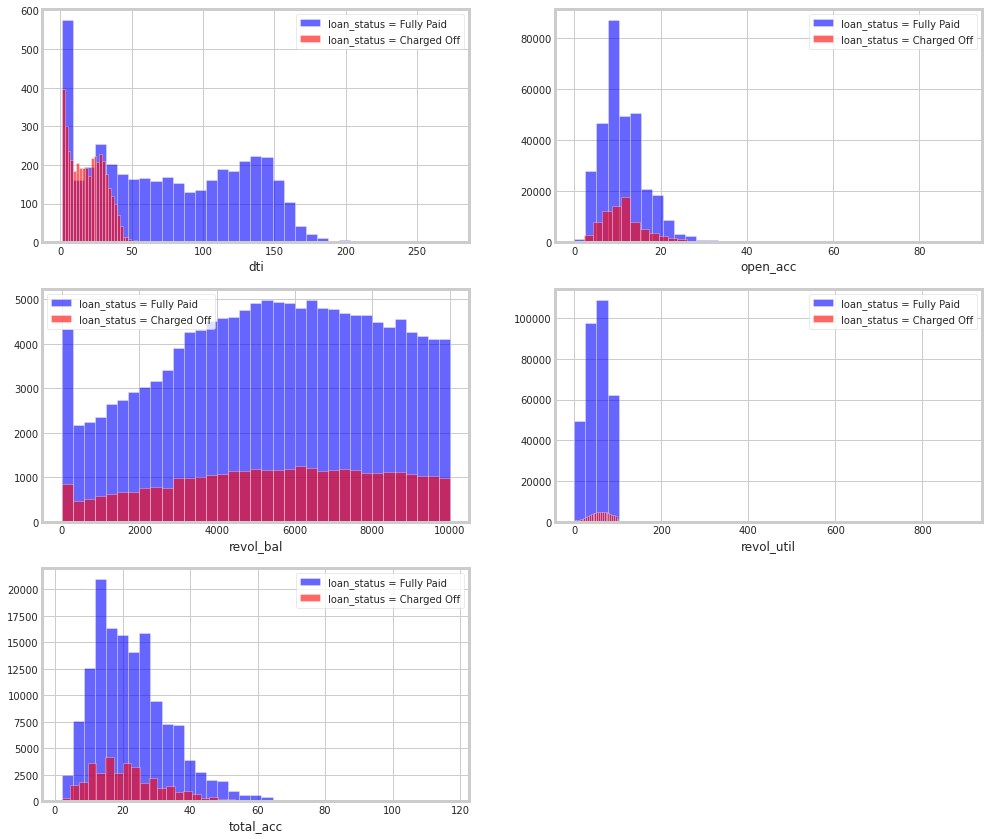

In [37]:
plt.figure(figsize=(15, 30))

plt.subplot(6, 2, 1)
data[data["loan_status"] == "Fully Paid"]["dti"].value_counts().hist(bins=35, color='blue', 
                                                                     label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["dti"].value_counts().hist(bins=35, color='red', 
                                                                      label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("dti")

plt.subplot(6, 2, 2)
data[data["loan_status"] == "Fully Paid"]["open_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["open_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("open_acc")

plt.subplot(6, 2, 3)
df = data[(data.revol_bal <= 10000)]
df[df["loan_status"] == "Fully Paid"]["revol_bal"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["revol_bal"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_bal")

plt.subplot(6, 2, 4)
data[data["loan_status"] == "Fully Paid"]["revol_util"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["revol_util"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_util")

plt.subplot(6, 2, 5)
df = data[(data.revol_bal <= 10000)]
df[df["loan_status"] == "Fully Paid"]["total_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["total_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("total_acc")

It seems that the smaller the dti the more likely that the loan will not be paid.
Only 217 borrower have more than 40 open credit lines.
Only 266 borrower have more than 80 credit line in the borrower credit file.


In [38]:
data.pub_rec.value_counts()


0.00     338272
1.00      49739
2.00       5476
3.00       1521
4.00        527
5.00        237
6.00        122
7.00         56
8.00         34
9.00         12
10.00        11
11.00         8
13.00         4
12.00         4
19.00         2
86.00         1
40.00         1
17.00         1
15.00         1
24.00         1
Name: pub_rec, dtype: int64

In [39]:
data.initial_list_status.value_counts()


f    238066
w    157964
Name: initial_list_status, dtype: int64

In [40]:
data.application_type.value_counts()


INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [41]:
data.mort_acc.value_counts()


0.00     139777
1.00      60416
2.00      49948
3.00      38049
4.00      27887
5.00      18194
6.00      11069
7.00       6052
8.00       3121
9.00       1656
10.00       865
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
23.00         2
32.00         2
26.00         2
31.00         2
30.00         1
28.00         1
34.00         1
Name: mort_acc, dtype: int64

In [42]:
data.pub_rec_bankruptcies.value_counts()


0.00    350380
1.00     42790
2.00      1847
3.00       351
4.00        82
5.00        32
6.00         7
7.00         4
8.00         2
Name: pub_rec_bankruptcies, dtype: int64

In [43]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [44]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

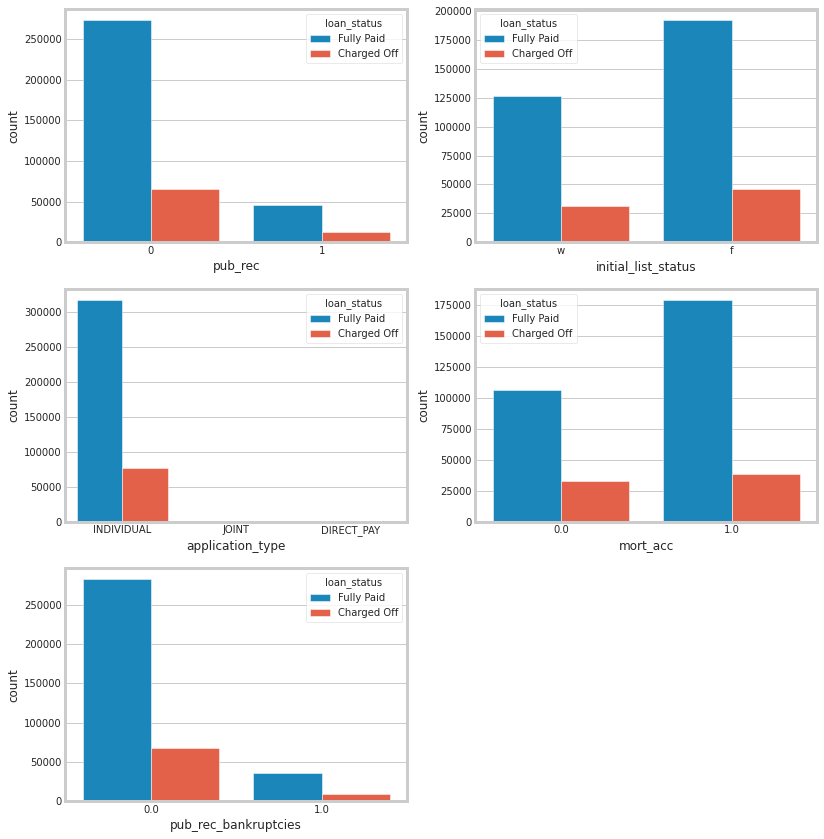

In [45]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

In [46]:
data['loan_status'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})


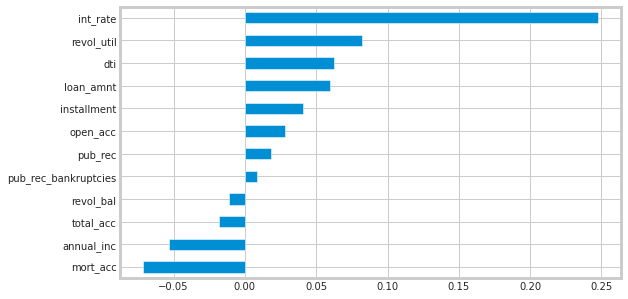

In [47]:
plt.figure(figsize=(8, 5))
data.corr()['loan_status'].drop('loan_status').sort_values().plot(kind='barh')

Conclusion:
We notice that, there are broadly three types of features:

Features related to the applicant (demographic variables such as occupation, employment details etc.),
Features related to loan characteristics (amount of loan, interest rate, purpose of loan etc.)

---



Data PreProcessing
Section Goals:

Remove or fill any missing data.

1.   Remove Unnecessary features
2.   Convert categorical features to dummy variables




In [48]:

print(f"The Length of the data: {data.shape}")

The Length of the data: (396030, 27)


In [49]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [50]:
data.emp_title.nunique()


139595

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [51]:
data.drop('emp_title', axis=1, inplace=True)

In [52]:
data.emp_length.unique()


array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [53]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
0   0.82
1   0.18
Name: loan_status, dtype: float64
4 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
< 1 year years in this position:
0   0.79
1   0.21
Name: loan_status, dtype: float64
6 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
9 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
2 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
3 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
8 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
7 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
5 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
1 year years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
nan years in this position:
Series([], Name: loan_status, dtype: float64)


Charge off rates are extremely similar across all employment lengths. So we are going to drop the emp_length column.

In [54]:
data.drop('emp_length', axis=1, inplace=True)

In [55]:
data.title.value_counts().head()


debt consolidation         168108
credit card refinancing     51781
home improvement            17117
other                       12993
consolidation                5583
Name: title, dtype: int64

In [56]:
data.purpose.value_counts().head()


debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: purpose, dtype: int64

The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.

In [57]:
data.drop('title', axis=1, inplace=True)

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach!

Let's review the other columsn to see which most highly correlates to mort_acc

In [58]:
data.mort_acc.value_counts()

1.00    218458
0.00    139777
Name: mort_acc, dtype: int64

In [59]:
data.mort_acc.isna().sum()

37795

In [60]:
data.corr()['mort_acc']

loan_amnt               0.21
int_rate               -0.09
installment             0.18
annual_inc              0.20
loan_status            -0.07
dti                    -0.02
open_acc                0.12
pub_rec                 0.05
revol_bal               0.17
revol_util              0.00
total_acc               0.30
mort_acc                1.00
pub_rec_bankruptcies    0.05
Name: mort_acc, dtype: float64

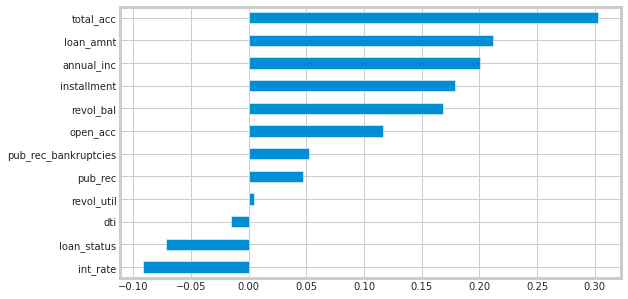

In [61]:
plt.figure(figsize=(8, 5))
data.corr()['mort_acc'].drop('mort_acc').sort_values().plot(kind='barh')

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [62]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc


In [64]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [65]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

evol_util & pub_rec_bankruptcies
These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns with dropna().



In [66]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [67]:
data.dropna(inplace=True)


In [68]:
data.shape


(395219, 24)

**Categorical Variables and Dummy** **Variables** 

In [69]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [70]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [71]:
data.drop('grade', axis=1, inplace=True)


We know that grade is just a sub feature of sub_grade, So we are goinig to drop it.

In [72]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [73]:
data.head()


,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,...,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.00,36 months,11.44,329.48,117000.00,Jan-2015,0,26.24,Jun-1990,16.00,0,36369.00,41.80,25.00,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
1,8000.00,36 months,11.99,265.68,65000.00,Jan-2015,0,22.05,Jul-2004,17.00,0,20131.00,53.30,27.00,1.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.00,36 months,10.49,506.97,43057.00,Jan-2015,0,12.79,Aug-2007,13.00,0,11987.00,92.20,26.00,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,7200.00,36 months,6.49,220.65,54000.00,Nov-2014,0,2.60,Sep-2006,6.00,0,5472.00,21.50,13.00,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,24375.00,60 months,17.27,609.33,55000.00,Apr-2013,1,33.95,Mar-1999,13.00,0,24584.00,69.80,43.00,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


address
We are going to feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [74]:
data.address.head()


0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [75]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])


In [76]:
data.zip_code.value_counts()


70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [77]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)


In [78]:
data.drop('address', axis=1, inplace=True)


In [79]:
data.head()


,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.00,36 months,11.44,329.48,117000.00,Jan-2015,0,26.24,Jun-1990,16.00,0,36369.00,41.80,25.00,0.00,0.00,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.00,36 months,11.99,265.68,65000.00,Jan-2015,0,22.05,Jul-2004,17.00,0,20131.00,53.30,27.00,1.00,0.00,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.00,36 months,10.49,506.97,43057.00,Jan-2015,0,12.79,Aug-2007,13.00,0,11987.00,92.20,26.00,0.00,0.00,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.00,36 months,6.49,220.65,54000.00,Nov-2014,0,2.60,Sep-2006,6.00,0,5472.00,21.50,13.00,0.00,0.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.00,60 months,17.27,609.33,55000.00,Apr-2013,1,33.95,Mar-1999,13.00,0,24584.00,69.80,43.00,1.00,0.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


issue_d
This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [80]:
data.drop('issue_d', axis=1, inplace=True)

earliest_cr_line
This appears to be a historical time stamp feature. Extract the year from this feature using a .apply() function, then convert it to a numeric feature.

In [81]:
data['earliest_cr_line'] = data.earliest_cr_line.str.split('-', expand=True)[1]


In [82]:
data.earliest_cr_line.nunique()


65

In [83]:
w_p = data.loan_status.value_counts()[0] / data.shape[0]
w_n = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")


Weight of positive values 0.8038479931379817
Weight of negative values 0.19615200686201828


In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler


X = data.drop('loan_status', axis=1)
y = data.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276653, 78)
(118566, 78)
(276653,)
(118566,)


In [86]:
from sklearn import preprocessing
def convert(X_train):
    number = preprocessing.LabelEncoder()
    X_train['term'] = number.fit_transform(X_train.term)
    return X_train

X_train=convert(X_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [89]:
from sklearn import preprocessing
def convert(X_test):
    number = preprocessing.LabelEncoder()
    X_test['term'] = number.fit_transform(X_test.term)
    return X_test

X_test=convert(X_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Normalize the data

In [90]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc

def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [92]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

ARTIFICIAL NEURAL NETWORKS

In [94]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [95]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=150,
    batch_size=32
)

Epoch 1/150
8646/8646 [==============================] - 39s 4ms/step - loss: 0.3307 - AUC: 0.8389 - val_loss: 711327.3750 - val_AUC: 0.5000
Epoch 2/150
8646/8646 [==============================] - 36s 4ms/step - loss: 0.2933 - AUC: 0.8744 - val_loss: 872036.4375 - val_AUC: 0.5000
Epoch 3/150
8646/8646 [==============================] - 36s 4ms/step - loss: 0.2857 - AUC: 0.8815 - val_loss: 788519.0625 - val_AUC: 0.5000
Epoch 4/150
8646/8646 [==============================] - 36s 4ms/step - loss: 0.2833 - AUC: 0.8844 - val_loss: 1735962.3750 - val_AUC: 0.5000
Epoch 5/150
8646/8646 [==============================] - 36s 4ms/step - loss: 0.2803 - AUC: 0.8874 - val_loss: 2200193.7500 - val_AUC: 0.5000
Epoch 6/150
8646/8646 [==============================] - 35s 4ms/step - loss: 0.2793 - AUC: 0.8880 - val_loss: 1710276.3750 - val_AUC: 0.5000
Epoch 7/150
8646/8646 [==============================] - 35s 4ms/step - loss: 0.2786 - AUC: 0.8885 - val_loss: 3349351.2500 - val_AUC: 0.5000
Epoch 8/1